In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2 as cv
import os
import skimage.morphology as sk
plt.style.use("ggplot")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imagenes/cheque3.png
/kaggle/input/imagenes/cheque1.png
/kaggle/input/imagenes/cheque4.png
/kaggle/input/imagenes/cheque5.png
/kaggle/input/imagenes/cheque2.png
/kaggle/input/imagenes/cheque6.png


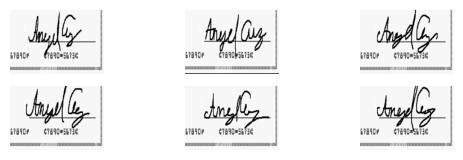

In [3]:
path = "/kaggle/input/imagenes/"

images = []
for i, p in enumerate(os.listdir(path)):
    img = cv.imread(path + p)
    img = cv.resize(img, (612, 512))
    img = np.array(cv.cvtColor(img, cv.COLOR_BGR2GRAY))
    img = img[320:, 330:]
    images.append(img)
    plt.subplot(5, 3, i+1)
    plt.imshow(img, cmap = 'gray')
    plt.axis(False)
plt.show()

## Images Preprocessing

In [4]:
def plot_img(img, cmap):
    plt.imshow(img, cmap = cmap)
    plt.axis(False)
    plt.show()

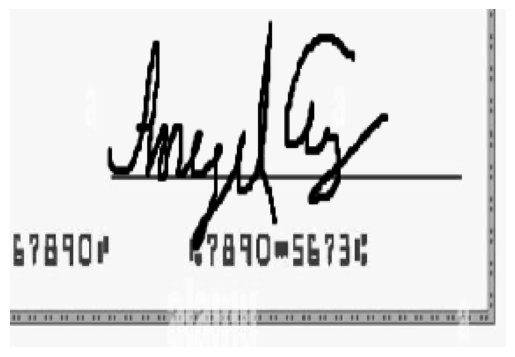

In [5]:
img = images[0].copy()
plot_img(img, "gray")

### Visualize the gray values of the image.

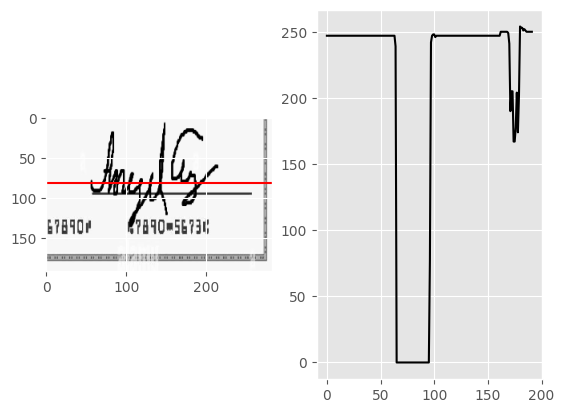

(192, 282)


In [6]:
x = img.shape[1]
y = img.shape[0]

X = np.arange(0, x)
Y = np.full((len(X)), y//2 - 15)

pixels = img[:, y//2]

plt.subplot(1, 2, 1)
plt.imshow(img, cmap = "gray")
plt.plot(X,Y, c = "red")

plt.subplot(1, 2, 2)
plt.plot(pixels, c = "black")

plt.show()
print(img.shape)

### Function to Binarize Images

In [59]:
def binarize(img):
    binarize_img = img.copy()
    binarize_img[binarize_img != 0] = 1
    return binarize_img

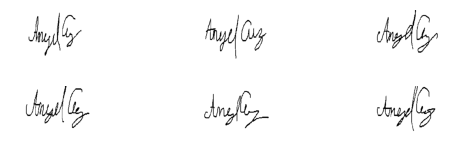

In [60]:
preprocessing_img = binarize(np.array(images, dtype= np.uint8))
for i, image in enumerate(preprocessing_img):
    plt.subplot(5, 3, i+1)
    plt.imshow(image, cmap = 'gray')
    plt.axis(False)
plt.show()

## Structuring Elements

In [61]:
parameters = 50
size = np.arange(start = 3, stop= 20, step = 1)
shape = [cv.MORPH_RECT, cv.MORPH_CROSS, cv.MORPH_ELLIPSE]

### Mathematical Morphology

In [54]:
def mth_morphology(img, element):
    shape = element.shape[0]
    total = 0
    y = 0
    while y+shape <= img.shape[0]:
        x = 0
        while x+shape <= img.shape[1]:
            total += np.sum(img[y:y+shape,x:x+shape] * element)
            x += 1
        y += 1
    return total

def get_elements(size, shape, n):
    elements = []
    for i in range(n):
        sh = np.random.choice(shape)
        sz = np.random.choice(size)
        elements.append(cv.getStructuringElement(sh, (sz,sz)))
    return elements

In [55]:
data = {}
elements = get_elements(size, shape, parameters)
for i, img in enumerate(preprocessing_img):
    row = {}
    for j in range(50):
        row[f"Element{j}"] = mth_morphology(img, elements[j])
    data[f"Image{i}"] = row

In [65]:
dataset = pd.DataFrame(data).T
dataset.head(3)

,Element0,Element1,Element2,Element3,Element4,Element5,Element6,Element7,Element8,Element9,...,Element40,Element41,Element42,Element43,Element44,Element45,Element46,Element47,Element48,Element49
Image0,810288.0,658359.0,4220033.0,4220033.0,2585711.0,1550164.0,5628015.0,658359.0,995739.0,354501.0,...,7709345.0,11796487.0,546821.0,6762756.0,1550164.0,3914568.0,7709345.0,255560.0,821576.0,1243722.0
Image1,805872.0,654771.0,4195460.0,4195460.0,2571083.0,1540392.0,5594556.0,654771.0,989940.0,352569.0,...,7662460.0,11720951.0,543785.0,6722928.0,1540392.0,3892212.0,7662460.0,254180.0,816884.0,1236249.0
Image2,802712.0,652217.0,4178791.0,4178791.0,2561001.0,1534186.0,5572197.0,652217.0,986007.0,351191.0,...,7631620.0,11673461.0,541653.0,6696096.0,1534186.0,3876813.0,7631620.0,253185.0,813653.0,1231320.0
